# Curve fitting births and deaths

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit, minimize

In [22]:
df = pd.read_csv('./1710000801-eng.csv')
df = df.transpose()

In [23]:
df = df.set_axis(df.iloc[0], axis=1)
df = df[1:]

In [24]:
df.head()

Components of population growth,NaN,Births,Deaths,Immigrants,Net emigration,Emigrants,Returning emigrants,Net temporary emigration,Net non-permanent residents,"Non-permanent residents, inflows",...,12,13,14,15,16,17,18,19,"How to cite: Statistics Canada. Table 17-10-0008-01 Estimates of the components of demographic growth, annual",https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1710000801
1971 / 1972,Persons,"351,256","159,533","117,036","26,577","66,034","39,457",..,"2,997",..,...,The net temporary emigrants is final up to 201...,A non-permanent resident refers to a person fr...,The net non-permanent residents is final up to...,This is an estimate of the number of non-perma...,"The number of people entering Canada to work, ...",The number of work and study permit holders le...,The net interprovincial migration is final up ...,Residual deviation is obtained by linearly dis...,NaN,NaN
1972 / 1973,NaN,"345,815","162,618","138,526","27,733","63,850","36,117",..,"7,994",..,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973 / 1974,NaN,"342,446","166,284","217,456","46,754","83,501","36,747",..,"-2,001",..,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1974 / 1975,NaN,"355,960","168,751","209,283","40,502","78,021","37,519",..,"7,989",..,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975 / 1976,NaN,"364,278","166,428","170,028","30,315","66,714","36,399",..,"-2,998",..,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.Deaths = df.Deaths.str.replace(',', '').astype(int)
df.Births = df.Births.str.replace(',', '').astype(int)

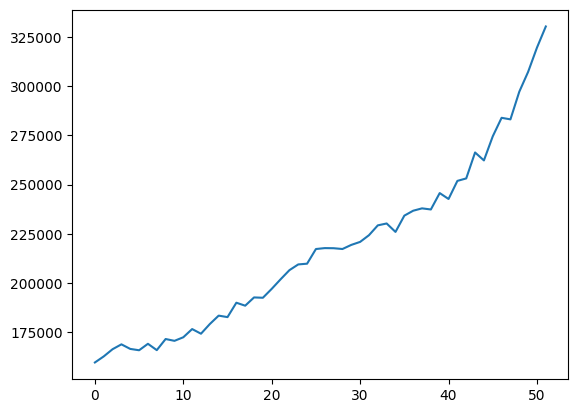

In [27]:
deaths = np.array(df.Deaths)
plt.plot(deaths)

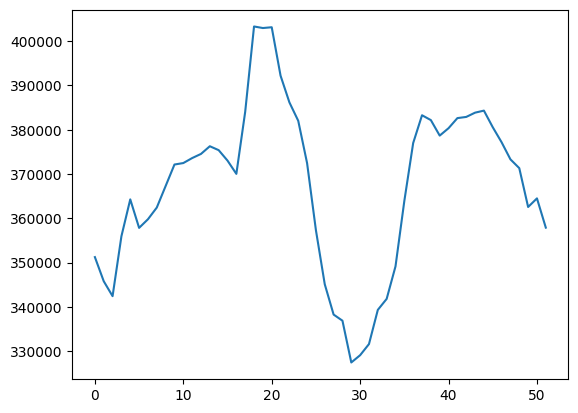

In [28]:
births = np.array(df.Births)
plt.plot(births)

In [29]:
deaths

array([159533, 162618, 166284, 168751, 166428, 165747, 169030, 165805,
       171460, 170535, 172352, 176522, 174159, 179085, 183353, 182599,
       189917, 188408, 192608, 192439, 196967, 201808, 206464, 209389,
       209766, 217221, 217688, 217632, 217229, 219320, 220847, 224254,
       229256, 230211, 225915, 234193, 236696, 237896, 237330, 245667,
       242669, 251865, 253122, 266313, 262278, 274517, 283939, 283148,
       297195, 307297, 319619, 330379])

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def run(n):
    ts = np.arange(0, n)
    K = sum(deaths)

    f = lambda t, p: p[0] * np.exp(p[1] * t)
    obj = lambda p: sum(f(ts, p) - deaths[:n]*np.log(f(ts, p))) 

    res = minimize(obj, [3, 1], bounds=[(0, None), (0, None)])

    dom = np.arange(0, len(deaths))
    plt.plot(dom, deaths)
    plt.plot(dom, f(dom, res.x))
    # plt.plot(ts, f(ts, res.x))

/var/folders/b6/zjrzfvq14h12kvt3_h7c4fwr0000gn/T/ipykernel_6469/2088906687.py:9: RuntimeWarning: overflow encountered in exp
  f = lambda t, p: p[0] * np.exp(p[1] * t)
/var/folders/b6/zjrzfvq14h12kvt3_h7c4fwr0000gn/T/ipykernel_6469/2088906687.py:10: RuntimeWarning: invalid value encountered in subtract
  obj = lambda p: sum(f(ts, p) - deaths[:n]*np.log(f(ts, p)))


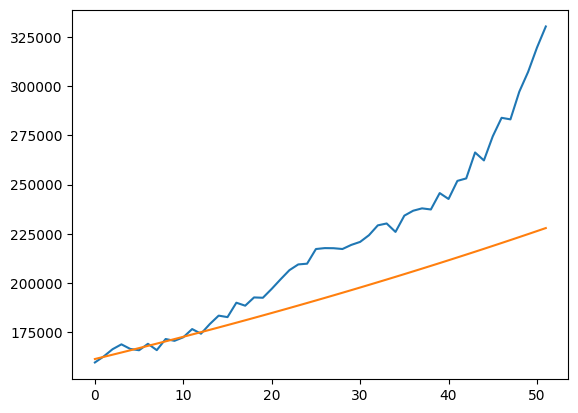

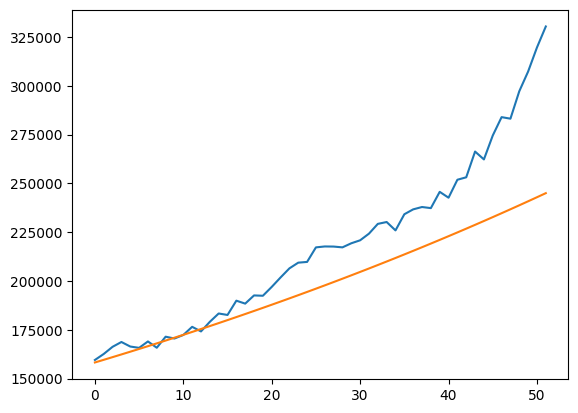

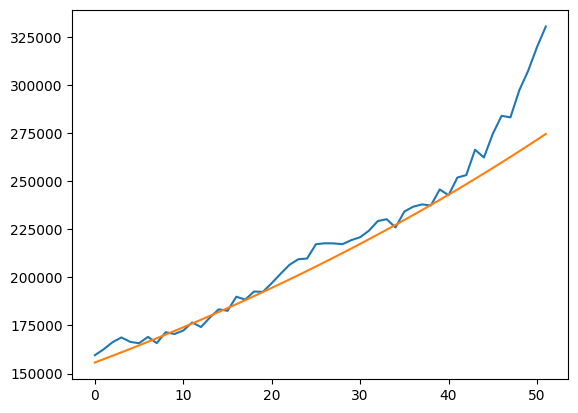

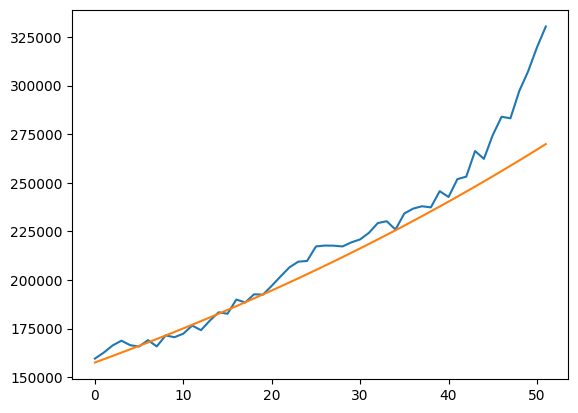

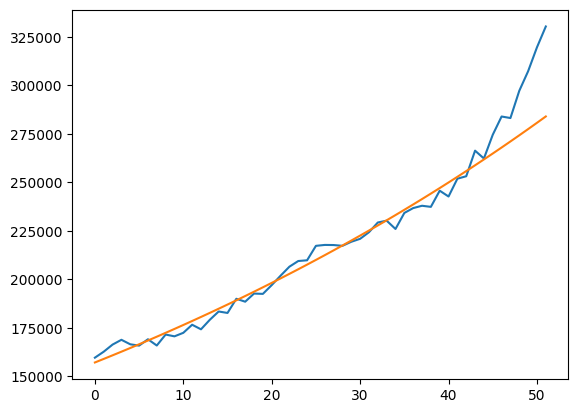

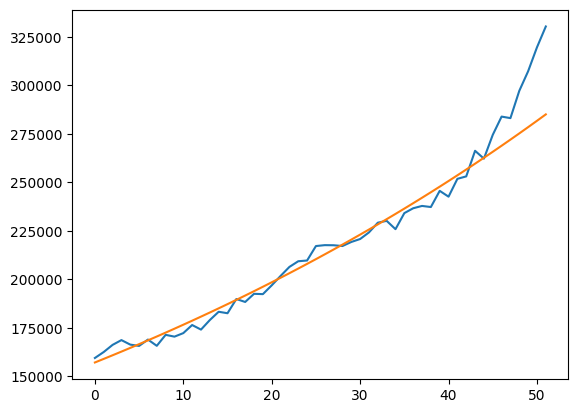

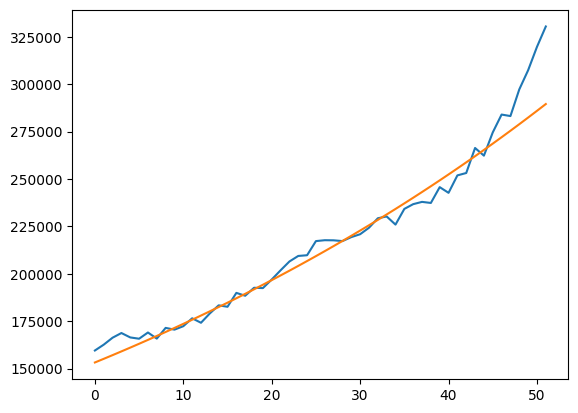

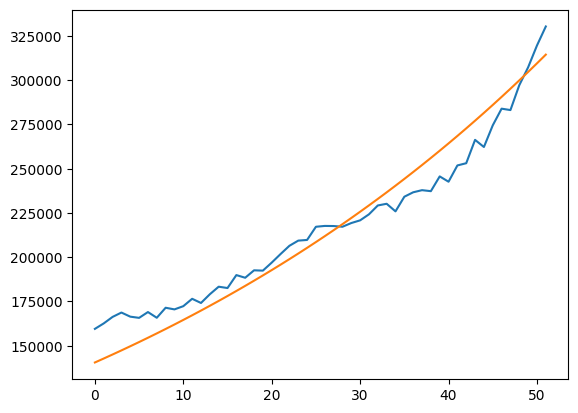

In [69]:
for i in range(10, 40, 4):
    plt.figure()
    run(i)

In [32]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.arange(len(deaths))
ydata = deaths

popt, pcov = curve_fit(func, xdata, ydata)
popt

/var/folders/b6/zjrzfvq14h12kvt3_h7c4fwr0000gn/T/ipykernel_6469/3714302685.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


array([ 2.70402046e+04, -3.68711803e-02,  1.37081906e+05])

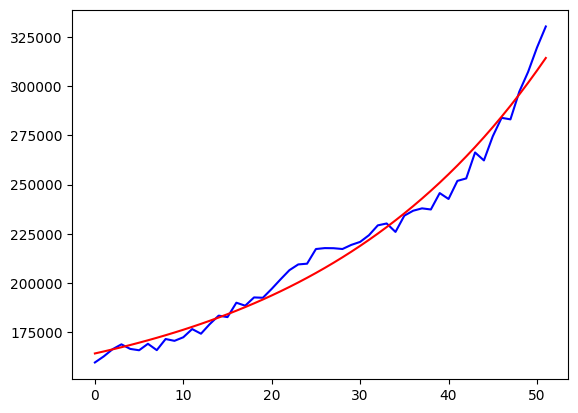

In [33]:
plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit')

In [34]:
def func(x, a, b, c):
    return np.sin(2*np.pi*x/27 - a ) * b +c

xdata = np.arange(len(births))
ydata = births

popt, pcov = curve_fit(func, xdata, ydata)
popt

array([ 1.16355001e+01, -2.18451124e+04,  3.66911137e+05])

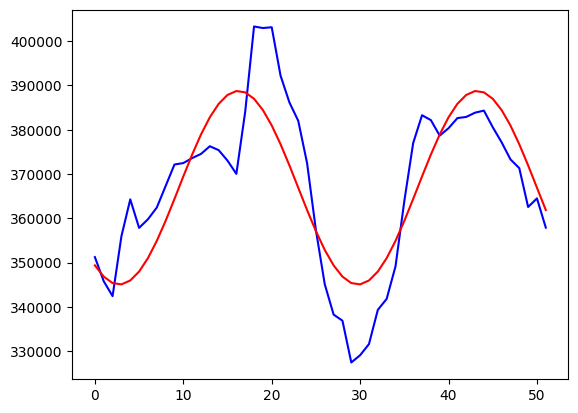

In [35]:
plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit')

In [36]:
K = sum(deaths)
def func(x, a, r):
    return K / (1 + (K/a - 1) * np.exp(-r * x))

xdata = np.arange(len(deaths))
ydata = deaths

popt, pcov = curve_fit(func, xdata, ydata)
popt

array([1.51593775e+05, 1.35756632e-02])

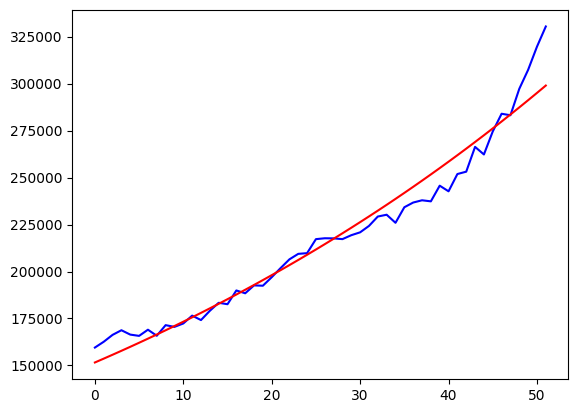

In [37]:
plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit')